In [1]:
pip install pandas numpy scikit-learn matplotlib


In [33]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\kesha\Downloads\Dataset_ATS_v2.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           7043 non-null   object
 1   SeniorCitizen    7043 non-null   int64 
 2   Dependents       7043 non-null   object
 3   tenure           7043 non-null   int64 
 4   PhoneService     7043 non-null   object
 5   MultipleLines    7043 non-null   object
 6   InternetService  7043 non-null   object
 7   Contract         7043 non-null   object
 8   MonthlyCharges   7043 non-null   int64 
 9   Churn            7043 non-null   object
dtypes: int64(3), object(7)
memory usage: 550.4+ KB
None
   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      41          Yes            No   
2  Female              0        Yes      52          Yes            No   


In [37]:
# Save the Preprocessed Dataset
df.to_csv("customer_churn_analysis/Data_Preparation/Preprocessed_Dataset.csv", index=False)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Encoding binary categorical variables
binary_cols = ['gender', 'Dependents', 'PhoneService', 'Churn']
label_encoders = {col: LabelEncoder() for col in binary_cols}

for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])

# One-hot encoding for multi-category categorical variables
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'Contract'], drop_first=True)

# Separating features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling numerical features
scaler = MinMaxScaler()
X_train[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges']])
X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges']])

print(X_train.head())


      gender  SeniorCitizen  Dependents    tenure  PhoneService  \
3757       1              0           1  0.013889             1   
3165       0              0           0  0.416667             1   
4912       0              1           0  0.638889             1   
3877       1              0           0  0.597222             1   
3818       1              0           0  0.013889             1   

      MonthlyCharges  MultipleLines_Yes  InternetService_Fiber optic  \
3757        0.415842              False                        False   
3165        0.366337              False                        False   
4912        0.811881               True                         True   
3877        0.475248              False                        False   
3818        0.019802               True                         True   

      Contract_One year  Contract_Two year  
3757              False               True  
3165               True              False  
4912              False      

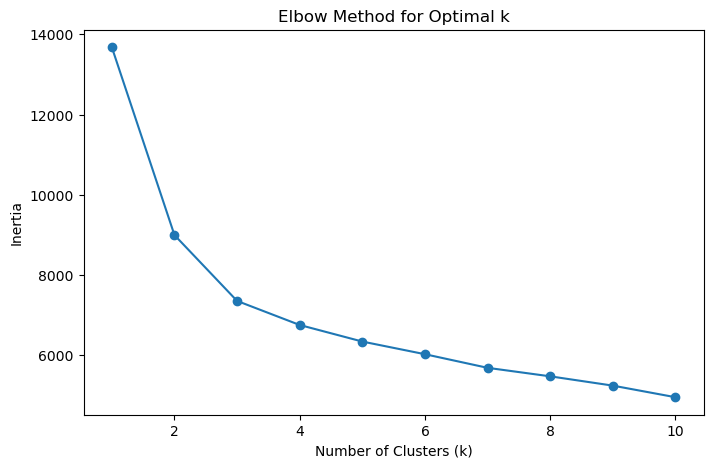

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


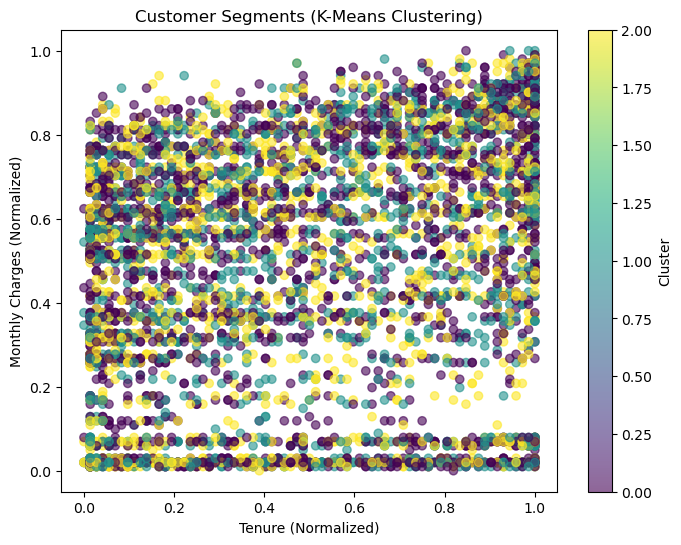

In [23]:
# Choose optimal k from the Elbow method (k=3)
optimal_k = 3

# Training the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
X_train['Cluster'] = kmeans.fit_predict(X_train)

# Visualizing the clusters using the first two features (tenure and MonthlyCharges)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['tenure'], X_train['MonthlyCharges'], c=X_train['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Tenure (Normalized)')
plt.ylabel('Monthly Charges (Normalized)')
plt.title('Customer Segments (K-Means Clustering)')
plt.colorbar(label='Cluster')
plt.show()


In [41]:
# Save preprocessed datasets
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Preprocessed datasets saved successfully!")


Preprocessed datasets saved successfully!


In [15]:
import joblib

# Save K-Means Model
joblib.dump(kmeans, "kmeans_model.pkl")

print("K-Means model saved successfully!")


K-Means model saved successfully!


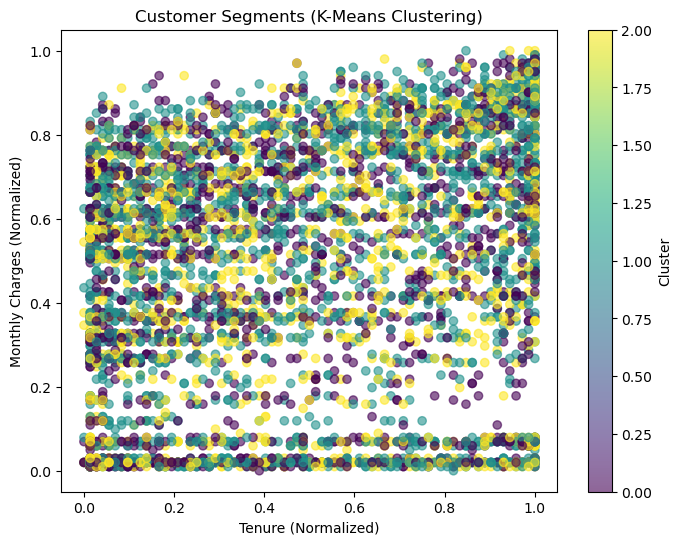

Clustering visualization saved successfully!


In [19]:
# Save the clustering visualization as an image
plt.figure(figsize=(8, 6))
plt.scatter(X_train['tenure'], X_train['MonthlyCharges'], c=X_train['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Tenure (Normalized)')
plt.ylabel('Monthly Charges (Normalized)')
plt.title('Customer Segments (K-Means Clustering)')
plt.colorbar(label='Cluster')

# Save plot as PNG
plt.savefig("clustering_visualization.png")
plt.show()

print("Clustering visualization saved successfully!")
